<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1">Setup</a></span></li><li><span><a href="#Kaggle-Dataset" data-toc-modified-id="Kaggle-Dataset-2">Kaggle Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Basic-Information" data-toc-modified-id="Basic-Information-2.0.1">Basic Information</a></span></li><li><span><a href="#Descriptive-Analysis" data-toc-modified-id="Descriptive-Analysis-2.0.2">Descriptive Analysis</a></span><ul class="toc-item"><li><span><a href="#Number-of-News-by-Year" data-toc-modified-id="Number-of-News-by-Year-2.0.2.1">Number of News by Year</a></span></li><li><span><a href="#Number-of-News-by-Month-and-Each-Year" data-toc-modified-id="Number-of-News-by-Month-and-Each-Year-2.0.2.2">Number of News by Month and Each Year</a></span></li><li><span><a href="#Number-of-News-by-Category" data-toc-modified-id="Number-of-News-by-Category-2.0.2.3">Number of News by Category</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

In [ ]:
kaggle = pd.read_json('/Users/caichenger/Desktop/4511/dataset/News_Category_Dataset_v3.json', lines=True)

# Kaggle Dataset

- DATA SOURCE: [click here](https://www.kaggle.com/datasets/rmisra/news-category-dataset?resource=download)
- DESCRIPTION:
    - Timeframe: 2012 to 2022 (11 years)
      - From 2012 to 2017, an average of 30,000 entries per year, around 2,000 entries per month
      - In 2018, approximately 8,000 entries for the year, with an average of 1,000 entries per month in the first half and around 100 entries per month in the second half
      - From 2019 to 2022, an average of 2,000 entries per year, approximately 150 entries per month on average
    - Source: HuffPost website
    - Data Volume: 210,000 entries (all non-null)
    - Fields: URL link, Title, Category, Short Description, Author, Time
- Problem:
  - if we consider this dataset, maybe the data quantity from 2019-2022 will influence the result's accuracy.

### Basic Information

In [ ]:
kaggle.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
print("kaggle rows:",kaggle.shape[0])
print("kaggle columns:",kaggle.shape[1])

kaggle rows: 209527
kaggle columns: 6


In [ ]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
print("Number of unique Category:", kaggle['category'].nunique())

word_counts = kaggle['short_description'].str.split().apply(len)
average_word_count = word_counts.mean()
print("Average number of words in short description:", average_word_count)

Number of unique Category: 42
Average number of words in short description: 19.66902594892305


### Descriptive Analysis

#### Number of News by Year

In [ ]:
def numbers_of_news_by_year(df):
    # Extract the year information and calculate the number of news per year
    news_per_year = df['date'].dt.year.value_counts().sort_index()

    # Create a line plot
    plt.figure(figsize=(8, 4), dpi=110)
    plt.plot(news_per_year.index, news_per_year.values, marker='o', linestyle='-', color='#226E9C', linewidth=1.5)

    # Add numerical labels
    for i, (year, count) in enumerate(zip(news_per_year.index, news_per_year.values)):
        plt.text(year, count, str(count), ha='right', va='bottom')

    # Get the current axis object and set the visibility of the border lines
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add title and labels
    plt.xlabel('Year')
    plt.ylabel('Number of News')
    plt.title('Number of News per Year')

    # Show the plot
    plt.xticks(news_per_year.index)  # Set x-axis ticks to years
    plt.grid(True, color="lightgrey", ls=":")
    plt.tight_layout()
    plt.show()

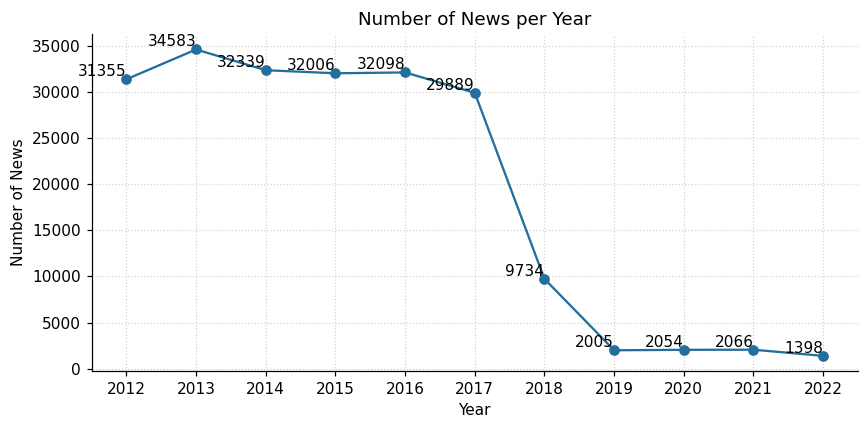

In [ ]:
numbers_of_news_by_year(kaggle)

#### Number of News by Month and Each Year

In [ ]:
# 提取年份和月份信息
kaggle['year'] = kaggle['date'].dt.year
kaggle['month'] = kaggle['date'].dt.month

# 计算每年每个月的新闻数量
news_per_month = kaggle.groupby(['year', 'month']).size().unstack().fillna(0)

# 计算每年的平均值和方差
mean_per_year = news_per_month.mean(axis=1).astype(int)
var_per_year = news_per_month.var(axis=1).astype(int)
stats_per_year = pd.DataFrame({'Mean': mean_per_year, 'Variance': var_per_year})

In [ ]:
def Number_of_news_by_month(news_per_month,stats_per_year):
    # 设置颜色映射
    cmap_first = LinearSegmentedColormap.from_list(
        name="custom_cmap",colors=["#E0FFFF","#BFEFFF", "#A4D3EE", "#6CA6CD", "#4F94CD","#226E9C"],N=5000)

    cmap_mean = LinearSegmentedColormap.from_list(
        name="cmap_mean", colors=["#E0FFFF","#BFEFFF", "#A4D3EE", "#6CA6CD", "#4F94CD","#226E9C"], N=5000)

    cmap_variance = LinearSegmentedColormap.from_list(
        name="cmap_variance", colors=["#FFF0F5", "#FFE4E1", "#FFE4E1", "#FFAEB9","#D8BFD8"], N=10000)

    mean_col_def = [
        ColumnDefinition(name="Mean",title="Mean",formatter=float,cmap=cmap_mean,border="left",)]
    variance_col_defs = [
        ColumnDefinition(name="Variance",title="Variance",formatter=float,cmap=cmap_variance,)]

    # 合并列定义
    col_defs = mean_col_def + variance_col_defs

    # 创建Figure和Axes对象
    fig, axs = plt.subplots(1, 2, figsize=(16, 6),gridspec_kw={'width_ratios': [1.5, 1]})

    # 创建热力图并添加到第一个Axes对象中
    heatmap = axs[0].imshow(news_per_month, cmap=cmap_first, aspect='auto')

    # 添加颜色条到第一个Axes对象中
    fig.colorbar(heatmap, ax=axs[0], label='Number of News')

    # 添加标签和标题到第一个Axes对象中
    axs[0].set_xlabel('Month')
    axs[0].set_ylabel('Year')
    axs[0].set_title('Number of News per Month')

    # 在每个方格中添加数值标签到第一个Axes对象中
    for i in range(len(news_per_month.index)):
        for j in range(len(news_per_month.columns)):
            axs[0].text(j, i, int(news_per_month.iloc[i, j]), ha='center', va='center', color='black')

    # 调整坐标轴刻度到第一个Axes对象中
    axs[0].set_xticks(range(12))
    axs[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axs[0].set_yticks(range(len(news_per_month.index)))
    axs[0].set_yticklabels(range(2012, 2023))

    # 创建表格并添加到第二个Axes对象中
    table = Table(
        stats_per_year,
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        ax=axs[1],
        textprops={"fontsize": 10,"ha": "center", "va": "center"},
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
        column_border_kw={"linewidth": 1, "linestyle": "-"})

    axs[1].set_title('Month Mean and Variacne per Month')

    # 调整图形布局
    plt.tight_layout()

    # 显示图形
    plt.show()

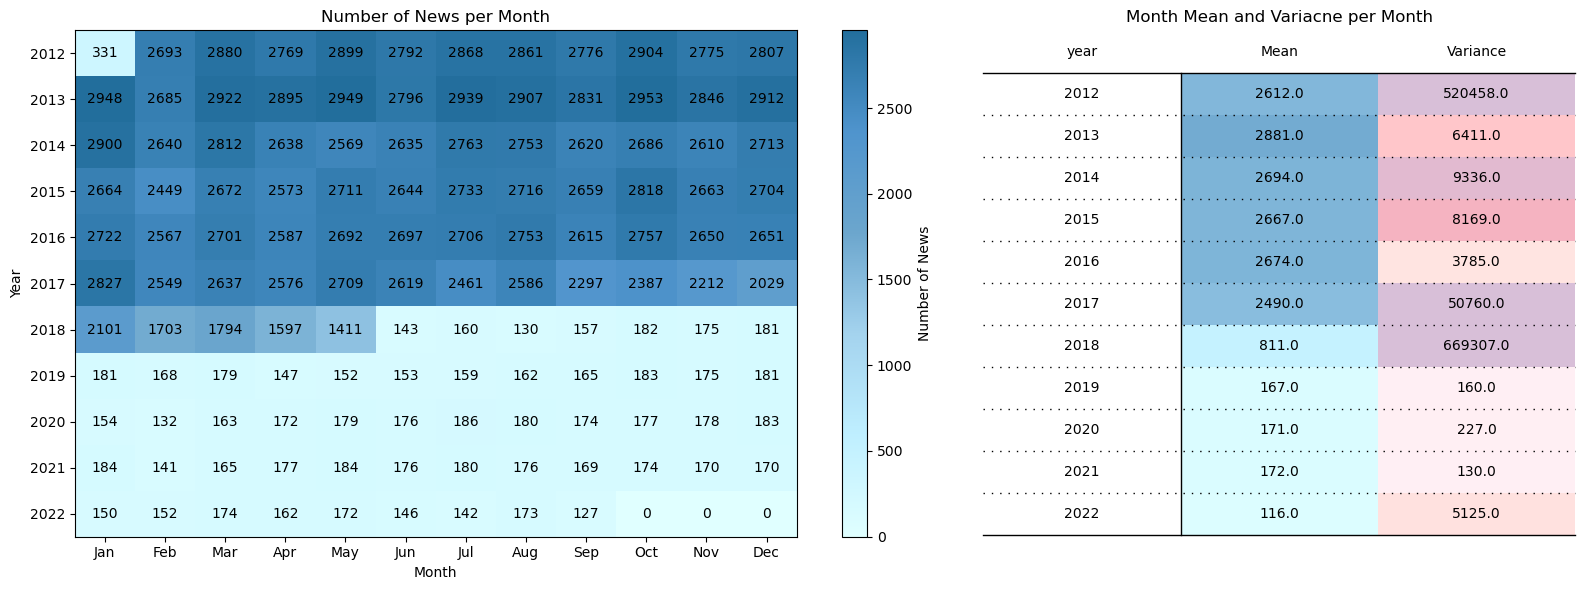

In [ ]:
Number_of_news_by_month(news_per_month,stats_per_year)


#### Number of News by Category

In [ ]:
def top_10_news(df):
    # 计算每个类别的出现次数
    category_counts = df['category'].value_counts()

    # 获取前十个类别和其出现次数
    top_ten_categories = category_counts.head(10)

    # 将数据分为前十个类别和其余类别
    top_ten_data = category_counts.loc[top_ten_categories.index]
    other_data = category_counts.loc[~category_counts.index.isin(top_ten_categories.index)]

    # 创建柱状图
    plt.figure(figsize=(10, 6), dpi=100)

    # 绘制前十个类别的柱状图
    bars = plt.bar(top_ten_data.index, top_ten_data.values, color='#226E9C', edgecolor='black', linewidth=0.75)

    # 绘制其余类别的柱状图，并用另一种颜色标记
    plt.bar(other_data.index, other_data.values, color='#BFEFFF', edgecolor='black', linewidth=0.75)

    # 获取当前的坐标轴对象并设置边框线的可见性
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # 添加标题和标签
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Count of Each Category in Kaggle Dataset')
    plt.grid(True, color="lightgrey", ls=":")

    # 旋转 x 轴标签以便显示
    plt.xticks(rotation='vertical')

    # 显示图形
    plt.tight_layout()
    plt.show()

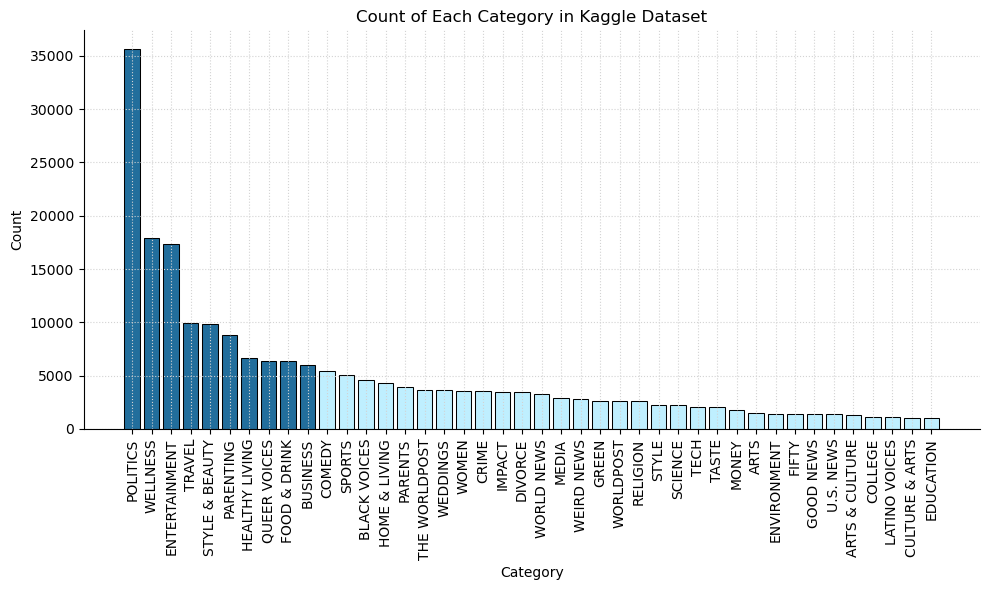

In [ ]:
top_10_news(kaggle)
## 前十是 政治，wellness，娱乐，旅行，时尚，健康生活，queer voices, 食物，business

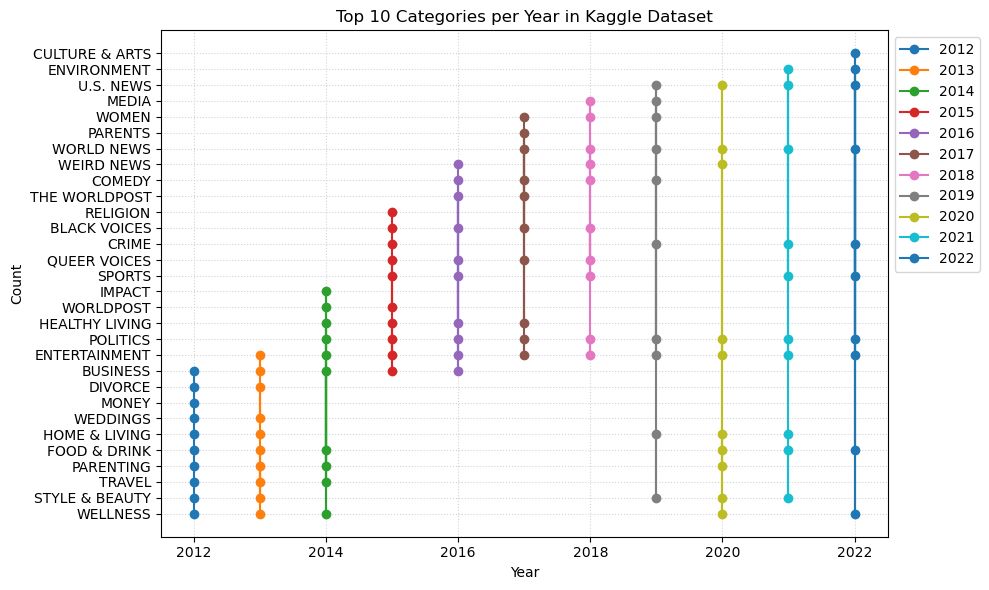

In [ ]:
## 每年前十变化

# 提取年份信息
kaggle['year'] = kaggle['date'].dt.year

# 计算每年每个新闻种类的数量
yearly_top_categories = kaggle.groupby(['year', 'category']).size().unstack().fillna(0)
yearly_top_categories_top10 = yearly_top_categories.apply(lambda x: x.nlargest(10).index.tolist(), axis=1)

# 创建折线图
plt.figure(figsize=(10, 6), dpi=100)

# 绘制每个年份前十个新闻种类的数量变化
for year in yearly_top_categories_top10.index:
    categories = yearly_top_categories_top10.loc[year]
    plt.plot([year] * len(categories), categories, marker='o', label=year)

# 添加标题和标签
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Categories per Year in Kaggle Dataset')

# 添加图例
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 显示图形
plt.grid(True, color="lightgrey", ls=":")
plt.tight_layout()
plt.show()